# COMMERCIAL SECTOR CONSUMPTION FORECASTING 

### Loading the Libraries

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed,Dropout
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
from tensorflow.keras.layers import Dropout, GRU
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### Read and load the dataset

In [17]:
# Load the data
Commercial_New = pd.read_excel('use_tot_sector.xlsx',sheet_name='Commercial Sector', header=1, index_col=0)

In [18]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Commercial_New.columns = Commercial_New.iloc[0]
Commercial = Commercial_New[1:-1]
print(Commercial)

State    1960    1961    1962    1963    1964    1965    1966    1967    1968  \
AK       7307    7744    7941   10116   12898   15276   16031   18156   19463   
AL      57186   64744   71604   77702   82040   82000   85463   85537   96195   
AR      36006   36795   41057   44315   47870   53889   61254   66520   71836   
AZ      67122   50833   48940   53383   65190   58323   59715   69120   71954   
CA     435911  488193  514602  532666  551289  577322  623839  644067  689567   
CO      56584   60042   64319   63921   73228   77240   84663   84631   98648   
CT      63357   64963   66976   69887   71355   73537   77553   81609   89937   
DC      32307   30581   32797   34786   41069   54583   56990   66197   67158   
DE      20756   18873   19993   21966   21961   25396   26770   23669   24736   
FL     106831  113395  129151  138411  152628  158470  167448  191561  206270   
GA      67054   68698   77192   80731   85525   92144   99203  107418  123385   
HI       5300    5576    574

### Load the states abbrevations and divide the years to 6 decades.

In [4]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Commercial_1960_1970 = Commercial.loc[:, '1960':'1970']
Commercial_1970_1980 = Commercial.loc[:, '1971':'1980']
Commercial_1980_1990 = Commercial.loc[:, '1981':'1990']
Commercial_1990_2000 = Commercial.loc[:, '1991':'2000']
Commercial_2000_2010 = Commercial.loc[:, '2001':'2010']
Commercial_2010_2020 = Commercial.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Commercial_1960_1970.mean(axis=1)
average_1970_1980 = Commercial_1970_1980.mean(axis=1)
average_1980_1990 = Commercial_1980_1990.mean(axis=1)
average_1990_2000 = Commercial_1990_2000.mean(axis=1)
average_2000_2010 = Commercial_2000_2010.mean(axis=1)
average_2010_2020 = Commercial_2010_2020.mean(axis=1)


### Print all states with its average for every 10 years for 6 decades

In [5]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 15618.36
State: Alabama - Value: 83661.45
State: Arkansas - Value: 56021.27
State: Arizona - Value: 64205.73
State: California - Value: 595216.64
State: Colorado - Value: 80877.27
State: Connecticut - Value: 78060.45
State: District of Columbia - Value: 51067.73
State: Delaware - Value: 23781.73
State: Florida - Value: 168872.09
State: Georgia - Value: 98845.36
State: Hawaii - Value: 7749.64
State: Iowa - Value: 87523.73
State: Idaho - Value: 32550.64
State: Illinois - Value: 435720.82
State: Indiana - Value: 139508.82
State: Kansas - Value: 74003.82
State: Kentucky - Value: 69728.91
State: Louisiana - Value: 111629.73
State: Massachusetts - Value: 238291.0
State: Maryland - Value: 95908.0
State: Maine - Value: 20466.18
State: Michigan - Value: 247505.55
State: Minnesota - Value: 94003.0
State: Missouri - Value: 141360.64
State: Mississippi - Value: 46887.36
State: Montana - Value: 30006.82
State: North Carolina - Value: 97873.0
State: 

### Average for 1960 to 1970 and dividing it into 5 clusters

In [6]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1960-1970')  
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Commercial_1960_1970.csv', index=True)



States in Cluster 0:
State: HI - Value: 7749.64
State: VT - Value: 11295.27
State: NH - Value: 11301.91
State: AK - Value: 15618.36
State: ND - Value: 16651.73
State: WY - Value: 17540.64
State: SD - Value: 20358.73
State: ME - Value: 20466.18
State: NV - Value: 21525.27
State: DE - Value: 23781.73
State: RI - Value: 25259.55
State: MT - Value: 30006.82
State: ID - Value: 32550.64
State: UT - Value: 37825.27
State: NM - Value: 40177.82
State: WV - Value: 42304.27
State: MS - Value: 46887.36
State: DC - Value: 51067.73
State: SC - Value: 52175.27
State: AR - Value: 56021.27
State: NE - Value: 60231.27
Cluster 0 Range: 7749.64 - 60231.27

States in Cluster 1:
State: AZ - Value: 64205.73
State: KY - Value: 69728.91
State: KS - Value: 74003.82
State: OK - Value: 75383.0
State: CT - Value: 78060.45
State: CO - Value: 80877.27
State: OR - Value: 80914.73
State: AL - Value: 83661.45
State: WA - Value: 85403.0
State: IA - Value: 87523.73
State: MN - Value: 94003.0
State: MD - Value: 95908.0
S

### Mapping Using Tablaue 

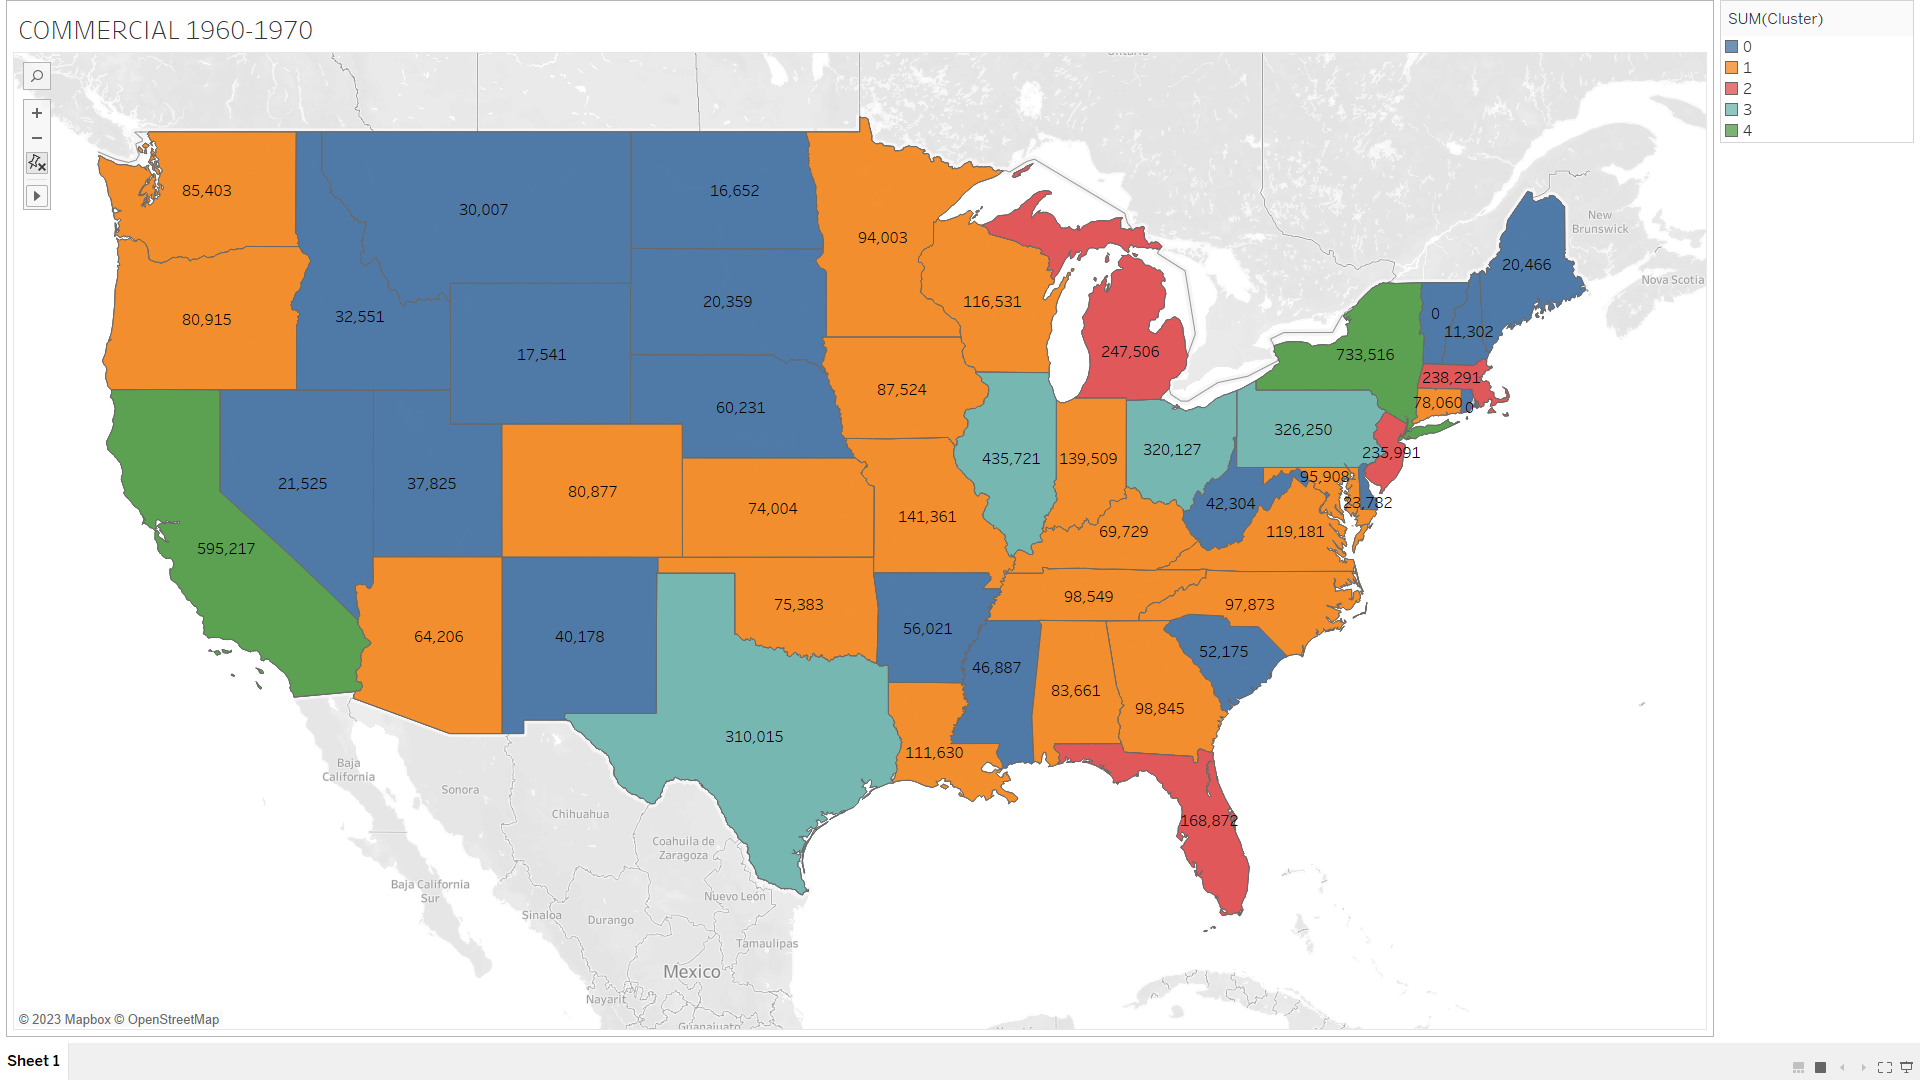

## Average for 1970 to 1980 and dividing it into 5 clusters

In [7]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980') 
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Commercial_1970-1980.csv', index=True)



States in Cluster 0:
State: HI - Value: 16231.9
State: VT - Value: 17639.2
State: NH - Value: 19749.4
State: WY - Value: 25636.5
State: SD - Value: 27739.7
State: ND - Value: 28144.1
State: ME - Value: 34058.3
State: DE - Value: 34914.6
State: AK - Value: 35486.8
State: RI - Value: 37113.8
State: MT - Value: 42712.0
State: NV - Value: 47179.2
State: ID - Value: 55051.2
State: UT - Value: 56058.4
State: DC - Value: 56218.8
State: WV - Value: 65606.7
State: NM - Value: 67399.0
State: MS - Value: 89582.4
State: AR - Value: 92728.2
State: NE - Value: 94005.7
Cluster 0 Range: 16231.90 - 94005.70

States in Cluster 1:
State: SC - Value: 114028.3
State: AZ - Value: 122851.9
State: CT - Value: 123732.7
State: AL - Value: 124713.5
State: KS - Value: 126355.1
State: IA - Value: 132267.0
State: OK - Value: 134377.1
State: OR - Value: 135594.4
State: KY - Value: 138057.5
State: CO - Value: 143304.9
State: MN - Value: 153357.8
State: MD - Value: 159244.0
State: TN - Value: 171876.0
State: WA - Val

### Mapping Using Tablaue 

### Average for 1980 to 1990 and dividing it into 5 clusters

In [8]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Commercial_1980-1990.csv', index=True)



States in Cluster 0:
State: VT - Value: 20127.4
State: HI - Value: 24383.0
State: SD - Value: 30594.9
State: DE - Value: 31132.0
State: ND - Value: 34008.2
State: NH - Value: 34158.8
State: WY - Value: 36679.0
State: RI - Value: 41433.2
State: ME - Value: 47953.1
State: NV - Value: 53450.8
State: MT - Value: 54921.3
State: AK - Value: 60973.2
State: ID - Value: 65370.0
State: DC - Value: 69464.8
State: UT - Value: 69937.0
State: WV - Value: 80601.2
State: NM - Value: 82532.3
State: MS - Value: 98026.7
State: AR - Value: 99272.8
State: NE - Value: 106055.9
Cluster 0 Range: 20127.40 - 106055.90

States in Cluster 1:
State: IA - Value: 130850.3
State: SC - Value: 145314.4
State: OR - Value: 148172.8
State: AL - Value: 150318.9
State: KS - Value: 154553.5
State: CT - Value: 161487.1
State: KY - Value: 164702.7
State: MD - Value: 166276.7
State: AZ - Value: 172945.9
State: MN - Value: 179434.1
State: OK - Value: 181130.5
State: TN - Value: 202937.2
State: CO - Value: 206868.0
Cluster 1 Ran

### Mapping Using Tablaue 

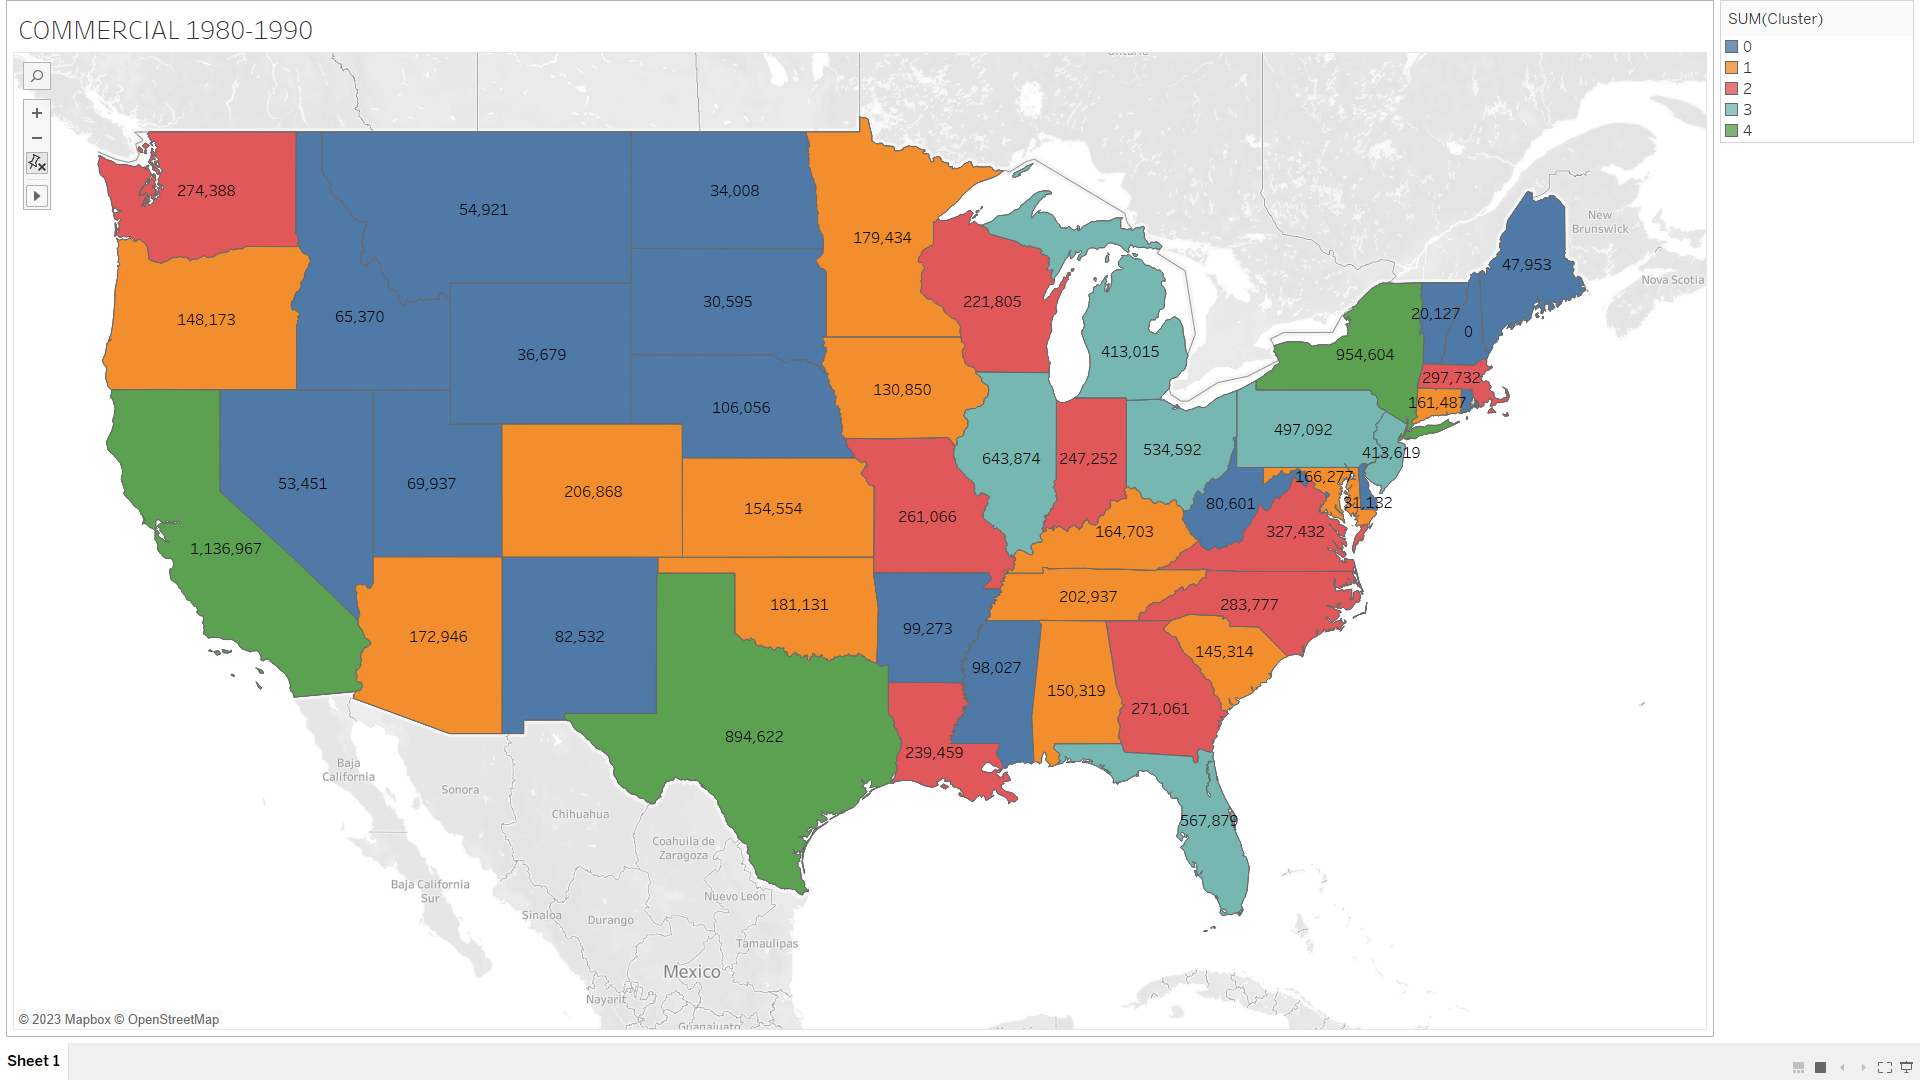

### Average for 1990 to 2000 and dividing it into 5 clusters

In [9]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000')  
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Commercial_1990-2000.csv', index=True)



States in Cluster 0:
State: VT - Value: 24914.3
State: HI - Value: 35646.7
State: SD - Value: 41413.6
State: ND - Value: 43479.2
State: WY - Value: 44564.4
State: DE - Value: 44624.4
State: RI - Value: 45967.0
State: ME - Value: 51607.5
State: NH - Value: 53638.0
State: MT - Value: 56050.9
State: AK - Value: 66876.9
State: ID - Value: 85769.6
State: WV - Value: 93070.0
State: NV - Value: 94593.6
State: NM - Value: 106408.3
State: UT - Value: 108387.7
State: DC - Value: 114139.1
State: AR - Value: 122152.9
State: NE - Value: 126103.6
State: MS - Value: 134505.0
Cluster 0 Range: 24914.30 - 134505.00

States in Cluster 1:
State: IA - Value: 157040.8
State: OR - Value: 190973.3
State: KS - Value: 192501.8
State: AL - Value: 197661.9
State: CT - Value: 204066.0
State: OK - Value: 204333.3
State: SC - Value: 205165.9
State: LA - Value: 208154.7
State: KY - Value: 215021.9
State: MN - Value: 215688.3
State: TN - Value: 237631.1
State: AZ - Value: 254275.6
State: CO - Value: 260157.0
State: W

### Mapping Using Tablaue

### Average for 2000 to 2010 and dividing it into 5 clusters

In [10]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010') 
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Commercial_2000-2010.csv', index=True)



States in Cluster 0:
State: VT - Value: 29836.6
State: HI - Value: 39709.9
State: RI - Value: 49890.8
State: WY - Value: 57456.0
State: DE - Value: 58897.3
State: SD - Value: 58927.5
State: ND - Value: 61209.9
State: ME - Value: 62891.1
State: AK - Value: 63461.5
State: NH - Value: 69833.2
State: MT - Value: 70927.5
State: ID - Value: 86062.1
State: WV - Value: 107309.6
State: NV - Value: 118586.2
State: NM - Value: 125063.6
State: DC - Value: 127703.3
State: NE - Value: 137397.7
State: UT - Value: 145585.9
State: AR - Value: 159935.8
State: MS - Value: 166139.0
State: IA - Value: 195430.2
State: OR - Value: 195720.6
State: CT - Value: 204388.0
State: KS - Value: 210870.7
Cluster 0 Range: 29836.60 - 210870.70

States in Cluster 1:
State: OK - Value: 236650.7
State: LA - Value: 244528.0
State: SC - Value: 258547.7
State: AL - Value: 260542.4
State: KY - Value: 265248.3
State: CO - Value: 296565.5
State: AZ - Value: 325470.8
State: MN - Value: 344640.6
State: MA - Value: 353191.8
State:

### Mapping using Tablaue

### Average for 2010 to 2020 and dividing it into 5 clusters

In [11]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Commercial_2010-2020.csv', index=True)



States in Cluster 0:
State: VT - Value: 26211.7
State: HI - Value: 41262.3
State: RI - Value: 47014.6
State: DE - Value: 58055.5
State: WY - Value: 61134.2
State: AK - Value: 62381.8
State: SD - Value: 63479.2
State: ME - Value: 64559.1
State: NH - Value: 69600.6
State: MT - Value: 79931.2
State: ND - Value: 84896.3
State: ID - Value: 88780.7
State: DC - Value: 107087.1
State: WV - Value: 110826.4
State: NM - Value: 124454.4
State: NV - Value: 132194.5
State: NE - Value: 138955.3
State: MS - Value: 155181.6
State: UT - Value: 164997.0
State: AR - Value: 176565.7
State: CT - Value: 187673.8
State: OR - Value: 191934.1
State: IA - Value: 199925.1
State: KS - Value: 214289.6
Cluster 0 Range: 26211.70 - 214289.60

States in Cluster 1:
State: OK - Value: 250152.0
State: AL - Value: 256012.4
State: KY - Value: 260885.9
State: LA - Value: 266525.3
State: SC - Value: 268098.7
State: CO - Value: 288350.2
State: AZ - Value: 347154.2
State: MN - Value: 352870.8
State: WI - Value: 362388.7
State:

### Mapping using Tablaue

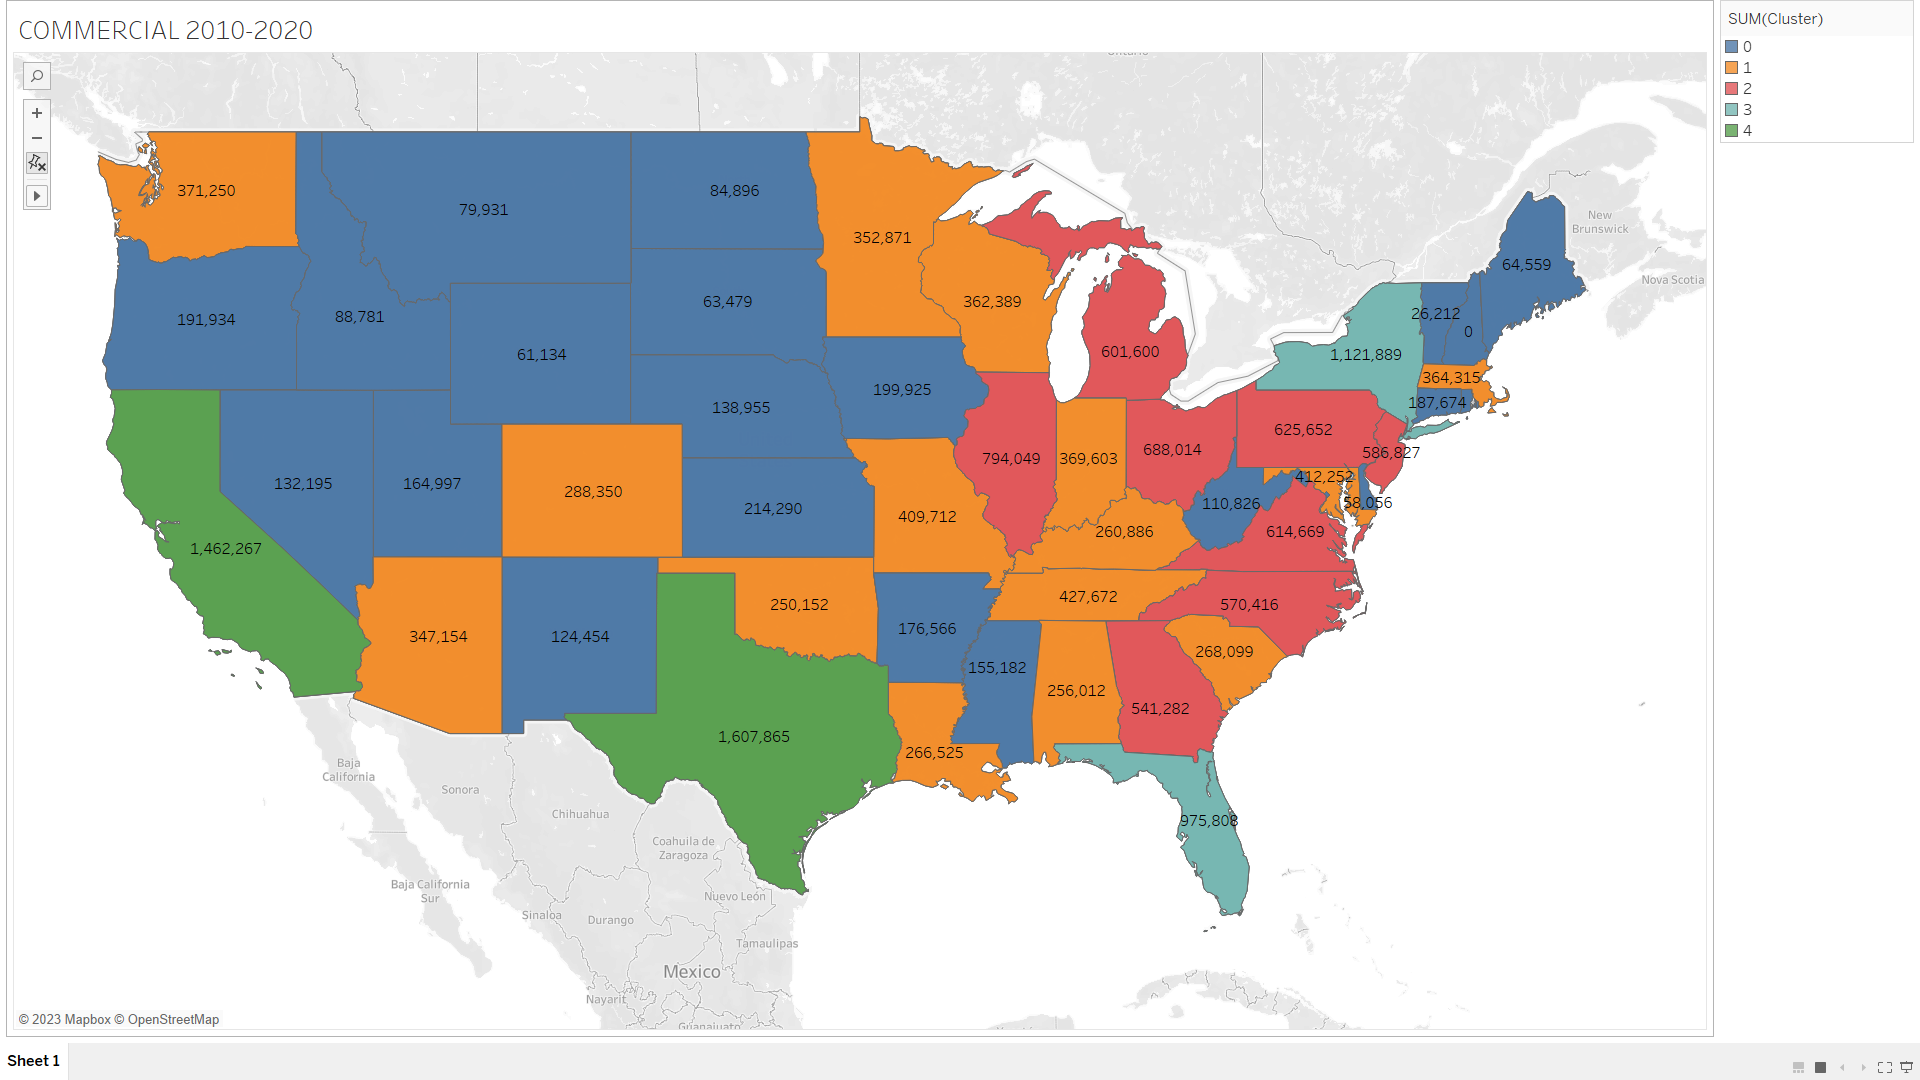

## Progression of the top 3 states 

### Progress of the states from 1960 to 1970

In [12]:
# Load the CSV file and read it
file_path = 'Commercial_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['NY','CA','FL','TX']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)

Information for states in the 1960-1970 interval:
    1960-1970  Cluster State Full Name
FL  168872.09        2         Florida
TX  310014.55        3           Texas
CA  595216.64        4      California
NY  733515.91        4        New York


### Progress of the states from 1970 to 1980

In [13]:
# Load the CSV file and read it
file_path = 'Commercial_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['NY','CA','FL','TX']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
FL   352184.4        2         Florida
TX   624245.6        3           Texas
NY   922201.1        4        New York
CA   949959.5        4      California


### Progress of the states from 1980 to 1990

In [14]:
# Load the CSV file and read it
file_path = 'Commercial_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['NY','CA','FL','TX']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
FL   567879.4        3         Florida
TX   894621.6        4           Texas
NY   954603.8        4        New York
CA  1136967.2        4      California


### Progress of the states from 1990 to 2000

In [15]:
# Load the CSV file and read it
file_path = 'Commercial_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['NY','CA','FL','TX']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1990-2000 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
FL   815012.3        3         Florida
TX  1084643.6        4           Texas
NY  1171411.6        4        New York
CA  1296876.1        4      California


### Progress of the states from 2000 to 2010

In [16]:
# Load the CSV file and read it
file_path = 'Commercial_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['NY','CA','FL','TX']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
FL  1009879.7        3         Florida
NY  1288400.4        4        New York
TX  1316350.3        4           Texas
CA  1499218.7        4      California


### Progress of the states from 2010 to 2020

In [17]:
# Load the CSV file and read it
file_path = 'Commercial_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['NY','CA','FL','TX']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2010-2020 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
FL   975807.8        3         Florida
NY  1121888.5        3        New York
CA  1462266.8        4      California
TX  1607864.7        4           Texas


### Ploting the states using Matplot

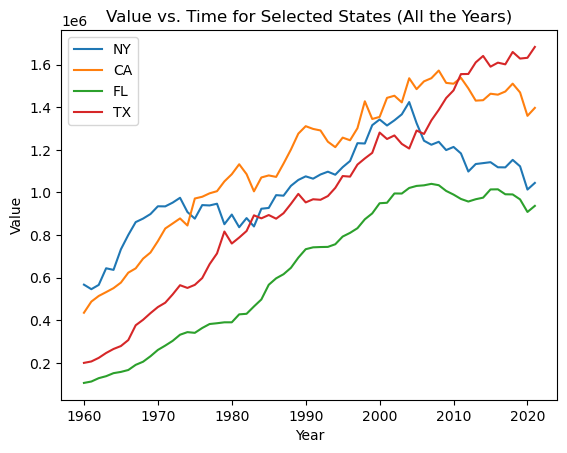

In [11]:
# Transpose the data to have years as rows and states as columns
Commercial_T_60 = Commercial.transpose()

# list of state abbreviations to plot
state_abbreviations =   ['NY','CA','FL','TX']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Commercial_T_60.index, Commercial_T_60[state], label=state)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

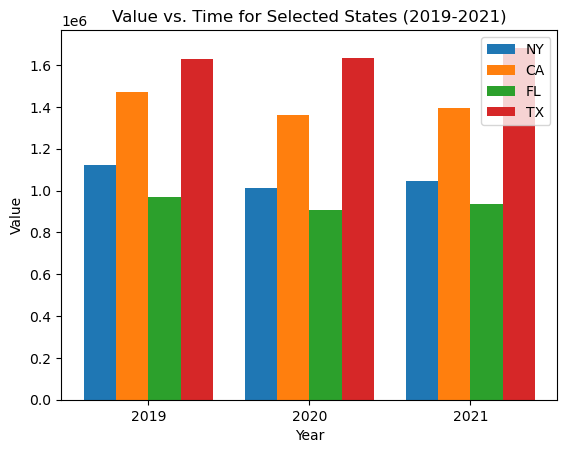

In [7]:
# Transpose the data to have years as rows and states as columns
Commercial_T = Commercial.transpose()

# Use iloc to get the required years (2019 to 2021)
selected_years = Commercial_T.loc['2019':'2021']

# list of state abbreviations to plot
state_abbreviations = ['NY', 'CA', 'FL', 'TX']

# Set the width of the bars
bar_width = 0.2  

# Plot data for the selected states with the correct legend label
for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions = np.arange(len(selected_years.index)) + i * bar_width
    
    plt.bar(x_positions, selected_years[state], label=state, width=bar_width)

# Add X-labels 
plt.xlabel('Year')
# Add Y-labels 
plt.ylabel('Value')
# Add Title
plt.title('Value vs. Time for Selected States (2019-2021)')
plt.xticks(np.arange(len(selected_years.index)) + (len(state_abbreviations) - 1) * bar_width / 2, selected_years.index)
plt.legend()

# Show the plot
plt.show()

## Deep Learning Forecasting 

### LSTM

In [5]:
# sequence length and threshold accuracy
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_mae_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['NY','CA','FL','TX']:
    # Extract the data for the selected state
    data = Commercial.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    custom_optimizer = Adam(learning_rate=0.001)
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, input_shape=(sequence_length_lstm, 1), activation='relu'))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)

    # Calculate the MAE
    mae_lstm = mean_absolute_error(actual_values_lstm, forecasts_lstm)
    
    # Store MSE,MAE AND MAE
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm
    state_mae_lstm[state] = mae_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE, RMSE, and MAE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

print("\nMean Absolute Error (MAE) for All States:")
for state, mae_value in state_mae_lstm.items():
    print(f"MAE for {state} (LSTM): {mae_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Commercial.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 295ms/step
Epoch 1/20
23/23 [==============================] - 2s 10ms/step - loss: 0.3466
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0521
Epoch 3/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0268
Epoch 4/20
23/23 [==============================] - 0s 14ms/step - loss: 0.0271
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0171
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 9/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 10/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0171
Epoch 11/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 12/20
23/23 [==============================] - 0s 9ms/step - l

32/32 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 19/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 2/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 3/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 5/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 6/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 7/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 8/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 9/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 10/20
33/33 [==============================] - 0s 9ms/step - loss: 0.00

42/42 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 17/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 18/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 19/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 2/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 3/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 4/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 5/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 6/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 7/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 8/20
43/43 [==============================] - 0s 10ms/step -

52/52 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 15/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 16/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 17/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 18/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 19/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 2/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 3/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 4/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 5/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 6/20
53/53 [==============================] - 0s 9ms/step - loss

62/62 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 13/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 14/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 16/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 17/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 18/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 19/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 20/20
1/1 [==============================] - 0s 189ms/step
Epoch 1/20
23/23 [==============================] - 1s 8ms/step - loss: 0.3520
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0233
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss

32/32 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 8/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 9/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 10/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 11/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 12/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 13/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 14/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 15/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 16/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 17/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 18/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 19/20
32/32 [==============================] - 0

42/42 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 6/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 7/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 8/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 9/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 10/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 11/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 12/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 13/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 14/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 15/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 16/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 17/20
42/42 [==============================] - 0s 

52/52 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 4/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 6/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 7/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 8/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 9/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 10/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 11/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 12/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 13/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 14/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 15/20
52/52 [==============================] - 0s 

62/62 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 2/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 3/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 5/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 6/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 7/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 8/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 9/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 10/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 11/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 12/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 13/20
62/62 [==============================] - 1s 8m

31/31 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 18/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0077
Epoch 19/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0072
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
32/32 [==============================] - 0s 15ms/step - loss: 0.0075
Epoch 2/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 5/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 6/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 8/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 9/20
32/32 [==============================] - 0s 9ms/step - loss: 0

41/41 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 16/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 17/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 18/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 19/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 2/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 3/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 4/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 5/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 6/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 7/20
42/42 [==============================] - 0s 7ms/step - loss: 0

51/51 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 14/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 15/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 16/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 17/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 18/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 19/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 2/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 3/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 4/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 

61/61 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 12/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0033
Epoch 13/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0033
Epoch 14/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0032
Epoch 15/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 16/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0034
Epoch 17/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0034
Epoch 18/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0032
Epoch 19/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0031
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0032
Epoch 3/20
62/62 [==============================] - 1s 9ms/step - l

31/31 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 7/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 8/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 9/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 10/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 11/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 12/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 13/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 14/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 15/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 16/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 17/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 18/20
31/31 [==============================] - 0

41/41 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 5/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 6/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0064
Epoch 7/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 8/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 9/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 10/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 11/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 12/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 13/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 14/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 15/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 16/20
41/41 [==============================] - 0

51/51 [==============================] - 1s 11ms/step - loss: 0.0045
Epoch 3/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0048
Epoch 4/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 5/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0048
Epoch 6/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 7/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 8/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0049
Epoch 9/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 10/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 11/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 12/20
51/51 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 13/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 14/20
51/51 [==============================] - 

1/1 [==============================] - 0s 28ms/step
Epoch 1/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 2/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0042
Epoch 3/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 4/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0043
Epoch 5/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0038
Epoch 6/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0040
Epoch 7/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0043
Epoch 8/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 9/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0045
Epoch 10/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0042
Epoch 11/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0038
Epoch 12/20
61/61 [==============================] - 1s 9ms/step - loss: 

### BAR GRAPH

In [14]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Commercial_T_60.iloc[-3:]

# list of state abbreviations to plot
state_abbreviations = ['NY', 'CA', 'FL', 'TX']

# Set the width of the bars
bar_width = 0.1

# colors for each state
state_colors =  {'NY': 'blue', 'CA': 'green', 'FL': 'orange', 'TX': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(selected_years)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# X-label
plt.xlabel('Year')
# Y-label
plt.ylabel('Billion Btu')
# Title
plt.title('Commercial Sector Energy Vs Time Using LSTM (2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) + 3) * bar_width / 2
plt.xticks(combined_years, selected_years.index)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# list of state abbreviations to plot
state_abbreviations =  ['NY', 'CA', 'FL', 'TX']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Commercial_T_60.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.15

# colors for each state
state_colors = {'NY': 'blue', 'CA': 'green', 'FL': 'orange', 'TX': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Commercial Sector Energy Vs Time Using LSTM (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### GRU

In [15]:
# sequence length and threshold accuracy
sequence_length_gru = 55
accuracy_threshold_gru = 0.01  

# Loop through each selected state for GRU
state_mse_gru = {}
state_rmse_gru = {}
state_mae_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['NY','CA','FL','TX']:
    # Extract the data for the selected state
    data = Commercial.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    custom_optimizer = Adam(learning_rate=0.001)
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1), return_sequences=True))
    model_gru.add(Dropout(0.5)) 
    model_gru.add(GRU(units=100, activation='relu', return_sequences=True))
    model_gru.add(Dropout(0.1))  
    model_gru.add(GRU(units=150, activation='relu'))
    model_gru.add(Dropout(0.05)) 
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    # Calculate the MAE
    mae_gru = mean_absolute_error(actual_values_gru, forecasts_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru
    state_mae_gru[state] = mae_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print MAE for selected states
print("\nMean Absolute Error (MAE) for All States:")
for state, mae_value in state_mae_gru.items():
    print(f"MAE for {state} (GRU): {mae_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Commercial.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 938ms/step
Epoch 1/20
8/8 [==============================] - 7s 67ms/step - loss: 0.2640
Epoch 2/20
8/8 [==============================] - 1s 68ms/step - loss: 0.0436
Epoch 3/20
8/8 [==============================] - 0s 53ms/step - loss: 0.0087
Epoch 4/20
8/8 [==============================] - 0s 55ms/step - loss: 0.0214
Epoch 5/20
8/8 [==============================] - 0s 58ms/step - loss: 0.0193
Epoch 6/20
8/8 [==============================] - 0s 58ms/step - loss: 0.0162
Epoch 7/20
8/8 [==============================] - 0s 58ms/step - loss: 0.0162
Epoch 8/20
8/8 [==============================] - 0s 61ms/step - loss: 0.0122
Epoch 9/20
8/8 [==============================] - 0s 58ms/step - loss: 0.0108
Epoch 10/20
8/8 [==============================] - 0s 55ms/step - loss: 0.0082
Epoch 11/20
8/8 [==============================] - 0s 47ms/step - loss: 0.0180
Epoch 12/20
8/8 [==============================] - 0s 49ms/step - loss: 0.0114
Epoch 13

17/17 [==============================] - 1s 39ms/step - loss: 0.0104
Epoch 19/20
17/17 [==============================] - 1s 44ms/step - loss: 0.0038
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
18/18 [==============================] - 1s 43ms/step - loss: 0.0044
Epoch 2/20
18/18 [==============================] - 1s 50ms/step - loss: 0.0059
Epoch 3/20
18/18 [==============================] - 1s 43ms/step - loss: 0.0042
Epoch 4/20
18/18 [==============================] - 1s 47ms/step - loss: 0.0086
Epoch 5/20
18/18 [==============================] - 1s 52ms/step - loss: 0.0053
Epoch 6/20
18/18 [==============================] - 1s 54ms/step - loss: 0.0029
Epoch 7/20
18/18 [==============================] - 1s 46ms/step - loss: 0.0036
Epoch 8/20
18/18 [==============================] - 1s 58ms/step - loss: 0.0031
Epoch 9/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0024
Epoch 10/20
18/18 [==============================] - 1s 56ms/step 

27/27 [==============================] - 2s 58ms/step - loss: 0.0034
Epoch 15/20
27/27 [==============================] - 2s 57ms/step - loss: 0.0029
Epoch 16/20
27/27 [==============================] - 2s 60ms/step - loss: 0.0034
Epoch 17/20
27/27 [==============================] - 2s 57ms/step - loss: 0.0038
Epoch 18/20
27/27 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 19/20
27/27 [==============================] - 2s 59ms/step - loss: 0.0046
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
28/28 [==============================] - 1s 42ms/step - loss: 0.0042
Epoch 2/20
28/28 [==============================] - 2s 61ms/step - loss: 0.0031
Epoch 3/20
28/28 [==============================] - 2s 62ms/step - loss: 0.0051
Epoch 4/20
28/28 [==============================] - 2s 55ms/step - loss: 0.0033
Epoch 5/20
28/28 [==============================] - 2s 57ms/step - loss: 0.0040
Epoch 6/20
28/28 [==============================] - 2s 61ms/st

37/37 [==============================] - 1s 38ms/step - loss: 0.0026
Epoch 11/20
37/37 [==============================] - 1s 39ms/step - loss: 0.0029
Epoch 12/20
37/37 [==============================] - 1s 39ms/step - loss: 0.0026
Epoch 13/20
37/37 [==============================] - 1s 39ms/step - loss: 0.0024
Epoch 14/20
37/37 [==============================] - 1s 38ms/step - loss: 0.0018
Epoch 15/20
37/37 [==============================] - 1s 39ms/step - loss: 0.0024
Epoch 16/20
37/37 [==============================] - 1s 39ms/step - loss: 0.0028
Epoch 17/20
37/37 [==============================] - 1s 38ms/step - loss: 0.0025
Epoch 18/20
37/37 [==============================] - 1s 38ms/step - loss: 0.0017
Epoch 19/20
37/37 [==============================] - 1s 37ms/step - loss: 0.0028
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0029
Epoch 2/20
38/38 [==============================] - 1s 39m

47/47 [==============================] - 2s 52ms/step - loss: 0.0019
Epoch 7/20
47/47 [==============================] - 2s 50ms/step - loss: 0.0022
Epoch 8/20
47/47 [==============================] - 2s 45ms/step - loss: 0.0021
Epoch 9/20
47/47 [==============================] - 2s 49ms/step - loss: 0.0033
Epoch 10/20
47/47 [==============================] - 2s 51ms/step - loss: 0.0020
Epoch 11/20
47/47 [==============================] - 2s 49ms/step - loss: 0.0020
Epoch 12/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0027
Epoch 13/20
47/47 [==============================] - 2s 38ms/step - loss: 0.0016
Epoch 14/20
47/47 [==============================] - 2s 39ms/step - loss: 0.0020
Epoch 15/20
47/47 [==============================] - 2s 36ms/step - loss: 0.0026
Epoch 16/20
47/47 [==============================] - 2s 38ms/step - loss: 0.0022
Epoch 17/20
47/47 [==============================] - 2s 42ms/step - loss: 0.0021
Epoch 18/20
47/47 [========================

52/52 [==============================] - 3s 56ms/step - loss: 0.0023
Epoch 5/20
52/52 [==============================] - 3s 57ms/step - loss: 0.0016
Epoch 6/20
52/52 [==============================] - 3s 56ms/step - loss: 0.0014
Epoch 7/20
52/52 [==============================] - 3s 55ms/step - loss: 0.0018
Epoch 8/20
52/52 [==============================] - 3s 54ms/step - loss: 0.0013
Epoch 9/20
52/52 [==============================] - 3s 54ms/step - loss: 0.0020
Epoch 10/20
52/52 [==============================] - 3s 53ms/step - loss: 0.0015
Epoch 11/20
52/52 [==============================] - 3s 55ms/step - loss: 0.0025
Epoch 12/20
52/52 [==============================] - 3s 54ms/step - loss: 0.0020
Epoch 13/20
52/52 [==============================] - 3s 58ms/step - loss: 0.0017
Epoch 14/20
52/52 [==============================] - 3s 56ms/step - loss: 0.0021
Epoch 15/20
52/52 [==============================] - 3s 56ms/step - loss: 0.0013
Epoch 16/20
52/52 [==========================

1/1 [==============================] - 0s 79ms/step
Epoch 1/20
62/62 [==============================] - 3s 52ms/step - loss: 0.0016
Epoch 2/20
62/62 [==============================] - 3s 48ms/step - loss: 0.0014
Epoch 3/20
62/62 [==============================] - 3s 55ms/step - loss: 0.0013
Epoch 4/20
62/62 [==============================] - 3s 51ms/step - loss: 0.0013
Epoch 5/20
62/62 [==============================] - 3s 49ms/step - loss: 0.0014
Epoch 6/20
62/62 [==============================] - 3s 52ms/step - loss: 0.0016
Epoch 7/20
62/62 [==============================] - 3s 51ms/step - loss: 0.0014
Epoch 8/20
62/62 [==============================] - 3s 53ms/step - loss: 0.0015
Epoch 9/20
62/62 [==============================] - 3s 52ms/step - loss: 0.0013
Epoch 10/20
62/62 [==============================] - 3s 52ms/step - loss: 0.0012
Epoch 11/20
62/62 [==============================] - 3s 54ms/step - loss: 0.0018
Epoch 12/20
62/62 [==============================] - 3s 53ms/step 

16/16 [==============================] - 1s 59ms/step - loss: 0.0274
Epoch 16/20
16/16 [==============================] - 1s 60ms/step - loss: 0.0497
Epoch 17/20
16/16 [==============================] - 1s 66ms/step - loss: 0.0230
Epoch 18/20
16/16 [==============================] - 1s 58ms/step - loss: 0.0442
Epoch 19/20
16/16 [==============================] - 1s 59ms/step - loss: 0.0301
Epoch 20/20
1/1 [==============================] - 0s 84ms/step
Epoch 1/20
17/17 [==============================] - 1s 58ms/step - loss: 0.0411
Epoch 2/20
17/17 [==============================] - 1s 51ms/step - loss: 0.0280
Epoch 3/20
17/17 [==============================] - 1s 59ms/step - loss: 0.0336
Epoch 4/20
17/17 [==============================] - 1s 54ms/step - loss: 0.0367
Epoch 5/20
17/17 [==============================] - 1s 61ms/step - loss: 0.0374
Epoch 6/20
17/17 [==============================] - 1s 60ms/step - loss: 0.0229
Epoch 7/20
17/17 [==============================] - 1s 55ms/ste

26/26 [==============================] - 1s 51ms/step - loss: 0.0250
Epoch 12/20
26/26 [==============================] - 1s 50ms/step - loss: 0.0219
Epoch 13/20
26/26 [==============================] - 2s 64ms/step - loss: 0.0150
Epoch 14/20
26/26 [==============================] - 1s 57ms/step - loss: 0.0263
Epoch 15/20
26/26 [==============================] - 2s 64ms/step - loss: 0.0179
Epoch 16/20
26/26 [==============================] - 1s 57ms/step - loss: 0.0193
Epoch 17/20
26/26 [==============================] - 2s 59ms/step - loss: 0.0208
Epoch 18/20
26/26 [==============================] - 1s 56ms/step - loss: 0.0093
Epoch 19/20
26/26 [==============================] - 2s 64ms/step - loss: 0.0250
Epoch 20/20
1/1 [==============================] - 0s 76ms/step
Epoch 1/20
27/27 [==============================] - 1s 56ms/step - loss: 0.0158
Epoch 2/20
27/27 [==============================] - 2s 57ms/step - loss: 0.0237
Epoch 3/20
27/27 [==============================] - 2s 59ms

36/36 [==============================] - 2s 58ms/step - loss: 0.0152
Epoch 8/20
36/36 [==============================] - 2s 53ms/step - loss: 0.0103
Epoch 9/20
36/36 [==============================] - 2s 53ms/step - loss: 0.0143
Epoch 10/20
36/36 [==============================] - 2s 52ms/step - loss: 0.0111
Epoch 11/20
36/36 [==============================] - 3s 72ms/step - loss: 0.0182
Epoch 12/20
36/36 [==============================] - 2s 51ms/step - loss: 0.0138
Epoch 13/20
36/36 [==============================] - 3s 71ms/step - loss: 0.0167
Epoch 14/20
36/36 [==============================] - 2s 47ms/step - loss: 0.0156
Epoch 15/20
36/36 [==============================] - 2s 45ms/step - loss: 0.0079
Epoch 16/20
36/36 [==============================] - 2s 44ms/step - loss: 0.0066
Epoch 17/20
36/36 [==============================] - 2s 51ms/step - loss: 0.0119
Epoch 18/20
36/36 [==============================] - 2s 49ms/step - loss: 0.0120
Epoch 19/20
36/36 [=======================

46/46 [==============================] - 2s 46ms/step - loss: 0.0127
Epoch 4/20
46/46 [==============================] - 2s 49ms/step - loss: 0.0096
Epoch 5/20
46/46 [==============================] - 2s 46ms/step - loss: 0.0076
Epoch 6/20
46/46 [==============================] - 2s 45ms/step - loss: 0.0068
Epoch 7/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0059
Epoch 8/20
46/46 [==============================] - 2s 40ms/step - loss: 0.0075
Epoch 9/20
46/46 [==============================] - 2s 48ms/step - loss: 0.0093
Epoch 10/20
46/46 [==============================] - 2s 50ms/step - loss: 0.0091
Epoch 11/20
46/46 [==============================] - 2s 42ms/step - loss: 0.0109
Epoch 12/20
46/46 [==============================] - 2s 48ms/step - loss: 0.0068
Epoch 13/20
46/46 [==============================] - 2s 53ms/step - loss: 0.0112
Epoch 14/20
46/46 [==============================] - 2s 45ms/step - loss: 0.0100
Epoch 15/20
46/46 [===========================

1/1 [==============================] - 0s 32ms/step
Epoch 1/20
56/56 [==============================] - 2s 43ms/step - loss: 0.0077
Epoch 2/20
56/56 [==============================] - 3s 47ms/step - loss: 0.0070
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 0.0078
Epoch 4/20
56/56 [==============================] - 3s 53ms/step - loss: 0.0090
Epoch 5/20
56/56 [==============================] - 3s 53ms/step - loss: 0.0060
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 0.0080
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 0.0065
Epoch 8/20
56/56 [==============================] - 3s 48ms/step - loss: 0.0074
Epoch 9/20
56/56 [==============================] - 3s 62ms/step - loss: 0.0076
Epoch 10/20
56/56 [==============================] - 3s 58ms/step - loss: 0.0059
Epoch 11/20
56/56 [==============================] - 3s 50ms/step - loss: 0.0146
Epoch 12/20
56/56 [==============================] - 3s 56ms/step 

10/10 [==============================] - 0s 46ms/step - loss: 0.0983
Epoch 15/20
10/10 [==============================] - 0s 49ms/step - loss: 0.0974
Epoch 16/20
10/10 [==============================] - 0s 44ms/step - loss: 0.1341
Epoch 17/20
10/10 [==============================] - 0s 46ms/step - loss: 0.1538
Epoch 18/20
10/10 [==============================] - 0s 45ms/step - loss: 0.0659
Epoch 19/20
10/10 [==============================] - 0s 43ms/step - loss: 0.0782
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
11/11 [==============================] - 0s 41ms/step - loss: 0.1051
Epoch 2/20
11/11 [==============================] - 0s 43ms/step - loss: 0.0587
Epoch 3/20
11/11 [==============================] - 0s 38ms/step - loss: 0.0653
Epoch 4/20
11/11 [==============================] - 0s 45ms/step - loss: 0.0694
Epoch 5/20
11/11 [==============================] - 0s 41ms/step - loss: 0.1032
Epoch 6/20
11/11 [==============================] - 1s 46ms/st

20/20 [==============================] - 1s 40ms/step - loss: 0.0421
Epoch 11/20
20/20 [==============================] - 1s 40ms/step - loss: 0.0249
Epoch 12/20
20/20 [==============================] - 1s 40ms/step - loss: 0.0300
Epoch 13/20
20/20 [==============================] - 1s 42ms/step - loss: 0.0350
Epoch 14/20
20/20 [==============================] - 1s 44ms/step - loss: 0.0417
Epoch 15/20
20/20 [==============================] - 1s 51ms/step - loss: 0.0310
Epoch 16/20
20/20 [==============================] - 1s 54ms/step - loss: 0.0263
Epoch 17/20
20/20 [==============================] - 1s 57ms/step - loss: 0.0337
Epoch 18/20
20/20 [==============================] - 1s 47ms/step - loss: 0.0262
Epoch 19/20
20/20 [==============================] - 1s 55ms/step - loss: 0.0378
Epoch 20/20
1/1 [==============================] - 0s 143ms/step
Epoch 1/20
21/21 [==============================] - 2s 73ms/step - loss: 0.0429
Epoch 2/20
21/21 [==============================] - 1s 60

30/30 [==============================] - 1s 45ms/step - loss: 0.0211
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0323
Epoch 8/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0186
Epoch 9/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0213
Epoch 10/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0195
Epoch 11/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0220
Epoch 12/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0213
Epoch 13/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0217
Epoch 14/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0223
Epoch 15/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0216
Epoch 16/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0143
Epoch 17/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0204
Epoch 18/20
30/30 [========================

40/40 [==============================] - 2s 43ms/step - loss: 0.0168
Epoch 3/20
40/40 [==============================] - 2s 50ms/step - loss: 0.0155
Epoch 4/20
40/40 [==============================] - 2s 49ms/step - loss: 0.0161
Epoch 5/20
40/40 [==============================] - 2s 52ms/step - loss: 0.0119
Epoch 6/20
40/40 [==============================] - 2s 41ms/step - loss: 0.0205
Epoch 7/20
40/40 [==============================] - 2s 44ms/step - loss: 0.0153
Epoch 8/20
40/40 [==============================] - 2s 41ms/step - loss: 0.0107
Epoch 9/20
40/40 [==============================] - 2s 40ms/step - loss: 0.0075
Epoch 10/20
40/40 [==============================] - 2s 49ms/step - loss: 0.0127
Epoch 11/20
40/40 [==============================] - 2s 49ms/step - loss: 0.0111
Epoch 12/20
40/40 [==============================] - 2s 41ms/step - loss: 0.0168
Epoch 13/20
40/40 [==============================] - 2s 40ms/step - loss: 0.0210
Epoch 14/20
40/40 [============================

49/49 [==============================] - 3s 53ms/step - loss: 0.0074
Epoch 20/20
1/1 [==============================] - 0s 49ms/step
Epoch 1/20
50/50 [==============================] - 2s 41ms/step - loss: 0.0123
Epoch 2/20
50/50 [==============================] - 2s 43ms/step - loss: 0.0144
Epoch 3/20
50/50 [==============================] - 2s 46ms/step - loss: 0.0083
Epoch 4/20
50/50 [==============================] - 2s 48ms/step - loss: 0.0083
Epoch 5/20
50/50 [==============================] - 2s 46ms/step - loss: 0.0089
Epoch 6/20
50/50 [==============================] - 2s 46ms/step - loss: 0.0152
Epoch 7/20
50/50 [==============================] - 3s 52ms/step - loss: 0.0081
Epoch 8/20
50/50 [==============================] - 3s 52ms/step - loss: 0.0070
Epoch 9/20
50/50 [==============================] - 2s 46ms/step - loss: 0.0075
Epoch 10/20
50/50 [==============================] - 3s 54ms/step - loss: 0.0141
Epoch 11/20
50/50 [==============================] - 2s 49ms/step 

59/59 [==============================] - 2s 40ms/step - loss: 0.0100
Epoch 16/20
59/59 [==============================] - 2s 40ms/step - loss: 0.0077
Epoch 17/20
59/59 [==============================] - 3s 43ms/step - loss: 0.0080
Epoch 18/20
59/59 [==============================] - 3s 47ms/step - loss: 0.0103
Epoch 19/20
59/59 [==============================] - 2s 41ms/step - loss: 0.0081
Epoch 20/20
1/1 [==============================] - 0s 54ms/step
Epoch 1/20
60/60 [==============================] - 3s 50ms/step - loss: 0.0086
Epoch 2/20
60/60 [==============================] - 4s 63ms/step - loss: 0.0109
Epoch 3/20
60/60 [==============================] - 3s 49ms/step - loss: 0.0105
Epoch 4/20
60/60 [==============================] - 3s 51ms/step - loss: 0.0103
Epoch 5/20
60/60 [==============================] - 3s 53ms/step - loss: 0.0072
Epoch 6/20
60/60 [==============================] - 3s 50ms/step - loss: 0.0103
Epoch 7/20
60/60 [==============================] - 3s 52ms/ste

14/14 [==============================] - 1s 49ms/step - loss: 0.0640
Epoch 10/20
14/14 [==============================] - 0s 33ms/step - loss: 0.0520
Epoch 11/20
14/14 [==============================] - 0s 32ms/step - loss: 0.0536
Epoch 12/20
14/14 [==============================] - 1s 37ms/step - loss: 0.0645
Epoch 13/20
14/14 [==============================] - 0s 32ms/step - loss: 0.0478
Epoch 14/20
14/14 [==============================] - 0s 33ms/step - loss: 0.0492
Epoch 15/20
14/14 [==============================] - 0s 32ms/step - loss: 0.0499
Epoch 16/20
14/14 [==============================] - 1s 40ms/step - loss: 0.0512
Epoch 17/20
14/14 [==============================] - 0s 32ms/step - loss: 0.0542
Epoch 18/20
14/14 [==============================] - 0s 32ms/step - loss: 0.0617
Epoch 19/20
14/14 [==============================] - 0s 30ms/step - loss: 0.0469
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
15/15 [==============================] - 1s 35

24/24 [==============================] - 1s 36ms/step - loss: 0.0292
Epoch 6/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0344
Epoch 7/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0319
Epoch 8/20
24/24 [==============================] - 1s 47ms/step - loss: 0.0184
Epoch 9/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0255
Epoch 10/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0308
Epoch 11/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0344
Epoch 12/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0367
Epoch 13/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0277
Epoch 14/20
24/24 [==============================] - 1s 35ms/step - loss: 0.0340
Epoch 15/20
24/24 [==============================] - 1s 30ms/step - loss: 0.0373
Epoch 16/20
24/24 [==============================] - 1s 38ms/step - loss: 0.0274
Epoch 17/20
24/24 [=========================

34/34 [==============================] - 1s 27ms/step - loss: 0.0210
Epoch 2/20
34/34 [==============================] - 1s 27ms/step - loss: 0.0209
Epoch 3/20
34/34 [==============================] - 1s 27ms/step - loss: 0.0206
Epoch 4/20
34/34 [==============================] - 1s 28ms/step - loss: 0.0214
Epoch 5/20
34/34 [==============================] - 1s 28ms/step - loss: 0.0198
Epoch 6/20
34/34 [==============================] - 1s 28ms/step - loss: 0.0170
Epoch 7/20
34/34 [==============================] - 1s 27ms/step - loss: 0.0182
Epoch 8/20
34/34 [==============================] - 1s 28ms/step - loss: 0.0199
Epoch 9/20
34/34 [==============================] - 1s 27ms/step - loss: 0.0189
Epoch 10/20
34/34 [==============================] - 1s 30ms/step - loss: 0.0206
Epoch 11/20
34/34 [==============================] - 1s 28ms/step - loss: 0.0188
Epoch 12/20
34/34 [==============================] - 1s 28ms/step - loss: 0.0197
Epoch 13/20
34/34 [=============================

43/43 [==============================] - 1s 32ms/step - loss: 0.0148
Epoch 19/20
43/43 [==============================] - 1s 29ms/step - loss: 0.0173
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
44/44 [==============================] - 1s 28ms/step - loss: 0.0167
Epoch 2/20
44/44 [==============================] - 1s 30ms/step - loss: 0.0184
Epoch 3/20
44/44 [==============================] - 1s 32ms/step - loss: 0.0144
Epoch 4/20
44/44 [==============================] - 1s 31ms/step - loss: 0.0144
Epoch 5/20
44/44 [==============================] - 1s 30ms/step - loss: 0.0171
Epoch 6/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0143
Epoch 7/20
44/44 [==============================] - 1s 32ms/step - loss: 0.0109
Epoch 8/20
44/44 [==============================] - 1s 34ms/step - loss: 0.0156
Epoch 9/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0155
Epoch 10/20
44/44 [==============================] - 1s 31ms/step 

53/53 [==============================] - 2s 35ms/step - loss: 0.0150
Epoch 15/20
53/53 [==============================] - 2s 33ms/step - loss: 0.0105
Epoch 16/20
53/53 [==============================] - 2s 32ms/step - loss: 0.0159
Epoch 17/20
53/53 [==============================] - 2s 34ms/step - loss: 0.0126
Epoch 18/20
53/53 [==============================] - 2s 29ms/step - loss: 0.0137
Epoch 19/20
53/53 [==============================] - 2s 32ms/step - loss: 0.0127
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
54/54 [==============================] - 2s 29ms/step - loss: 0.0134
Epoch 2/20
54/54 [==============================] - 2s 33ms/step - loss: 0.0130
Epoch 3/20
54/54 [==============================] - 2s 34ms/step - loss: 0.0100
Epoch 4/20
54/54 [==============================] - 2s 31ms/step - loss: 0.0112
Epoch 5/20
54/54 [==============================] - 2s 33ms/step - loss: 0.0147
Epoch 6/20
54/54 [==============================] - 2s 31ms/st

In [58]:
# Display the model summary
model_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 38, 64)            256       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 19, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 17, 32)            6176      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 100)             

### BAR GRAPH

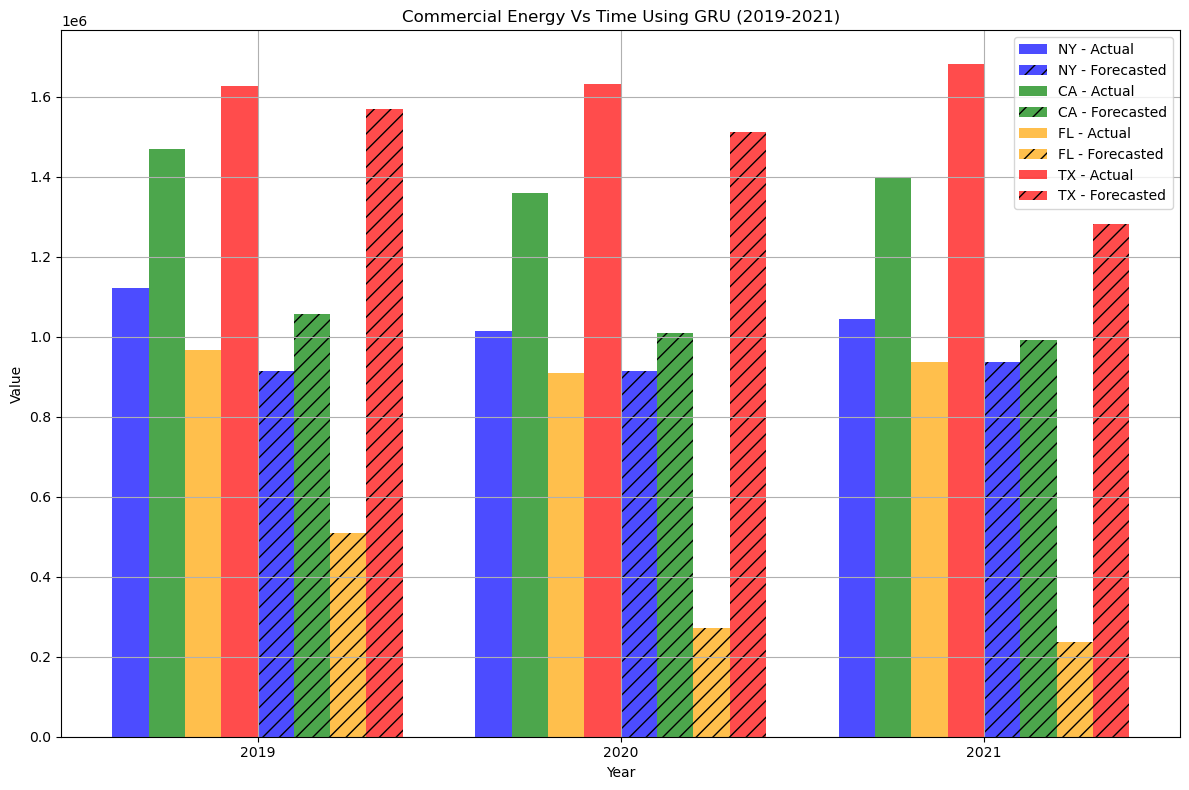

In [90]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Commercial_T_60.iloc[-3:]

# list of state abbreviations to plot
state_abbreviations = ['NY', 'CA', 'FL', 'TX']

# Set the width of the bars
bar_width = 0.1

# colors for each state
state_colors =  {'NY': 'blue', 'CA': 'green', 'FL': 'orange', 'TX': 'red'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(selected_years)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# X-label
plt.xlabel('Year')
# Y-label
plt.ylabel('Value')
# Title
plt.title('Commercial Energy Vs Time Using GRU (2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) + 3) * bar_width / 2
plt.xticks(combined_years, selected_years.index)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### CNN

In [26]:
# sequence length and threshold accuracy
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state for CNN
state_mse_cnn = {}
state_rmse_cnn = {}
state_mae_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {} 

for state in ['NY','CA','FL','TX']:
    # Extract the data for the selected state
    data = Commercial.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a more complex CNN model with different learning rate
    custom_optimizer = Adam(learning_rate=0.001)
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=100, activation='relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.compile(optimizer=custom_optimizer, loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []
    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)
            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))
    # Calculate the MSE
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)
    # Calculate the RMSE
    rmse_cnn = np.sqrt(mse_cnn)
    # Calculate the MAE
    mae_cnn = mean_absolute_error(actual_values_cnn, forecasts_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn
    state_mae_cnn[state] = mae_cnn
    
    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}
    
# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}") 
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")
# Print MAE for selected states
print("\nMean Absolute Error (MAE) for All States:")
for state, mae_value in state_mae_cnn.items():
    print(f"MAE for {state} (CNN): {mae_value:.2f}")
# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")
# Print predictions for 2019, 2020, and 2021 for selected states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")
# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}
for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Commercial.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state
# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 287ms/step
Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.1865
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0585
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0381
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 12/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0

32/32 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 20/20
1/1 [==============================] - 0s 17ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 10/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 11/20
33/33 [==============================] - 0s 3ms/step - loss: 0.00

42/42 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 19/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 9/20
43/43 [==============================] - 0s 5ms/step - loss: 0.00

52/52 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 15/20
52/52 [==============================] - 0s 3ms/step - loss: 9.3445e-04
Epoch 16/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 17/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 9.8653e-04
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 7.4916e-04
Epoch 5/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6/20
53/53 [==============================] - 0s 3ms/st

62/62 [==============================] - 0s 2ms/step - loss: 9.6099e-04
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 7.2451e-04
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 6.7295e-04
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/20
62/62 [==============================] - 0s 2ms/step - loss: 6.2336e-04
Epoch 12/20
62/62 [==============================] - 0s 2ms/step - loss: 6.7737e-04
Epoch 13/20
62/62 [==============================] - 0s 3ms/step - loss: 6.0109e-04
Epoch 14/20
62/62 [==============================] - 0s 3ms/step - loss: 7.2919e-04
Epoch 15/20
62/62 [==============================] - 0s 2ms/step - loss: 7.7739e-04
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 6.2558e-04
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 8.4664e-04
Epoch 18/20
62/62 [==============================] - 0s 3ms/step - loss: 7.1289e-04
Epoch 19/2

32/32 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 13/20
32/32 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 33ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 9/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 11/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 12/20
42/42 [==============================] - 0s 2ms/step - loss: 0.00

51/51 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 19/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 20/20
1/1 [==============================] - 0s 22ms/step
Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 8/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.00

61/61 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 17/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 18/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 19/20
61/61 [==============================] - 0s 2ms/step - loss: 9.3117e-04
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 2/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 9.5823e-04
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - l

31/31 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 12/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 13/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 14/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 15/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 16/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 17/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 18/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 19/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 20/20
1/1 [==============================] - 0s 41ms/step
Epoch 1/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss

41/41 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 10/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 12/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 13/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 14/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 15/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 16/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 17/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 18/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 19/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - lo

51/51 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 8/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 10/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 11/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 12/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 13/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 14/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 15/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 16/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 17/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 18/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 19/20
51/51 [==============================] - 0

61/61 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 7/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 8/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 9/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 11/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 12/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 13/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 14/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 15/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 16/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 17/20
61/61 [==============================] - 0s 

1/1 [==============================] - 0s 16ms/step
Epoch 1/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 5/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 6/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 7/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 8/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 11/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 12/20
31/31 [==============================] - 0s 2ms/step - loss: 0.00

40/40 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 2/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 3/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 4/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 5/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 7/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 8/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 9/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 10/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.00

50/50 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 18/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 19/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 2/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 8/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.00

60/60 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 17/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 2/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 3/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 4/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 5/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 6/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 7/20
61/61 [==============================] - 0s 3ms/step - loss: 0.

In [56]:
# Display the model summary
model_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 38, 64)            256       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 19, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 17, 32)            6176      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 100)             

### BAR GRAPH

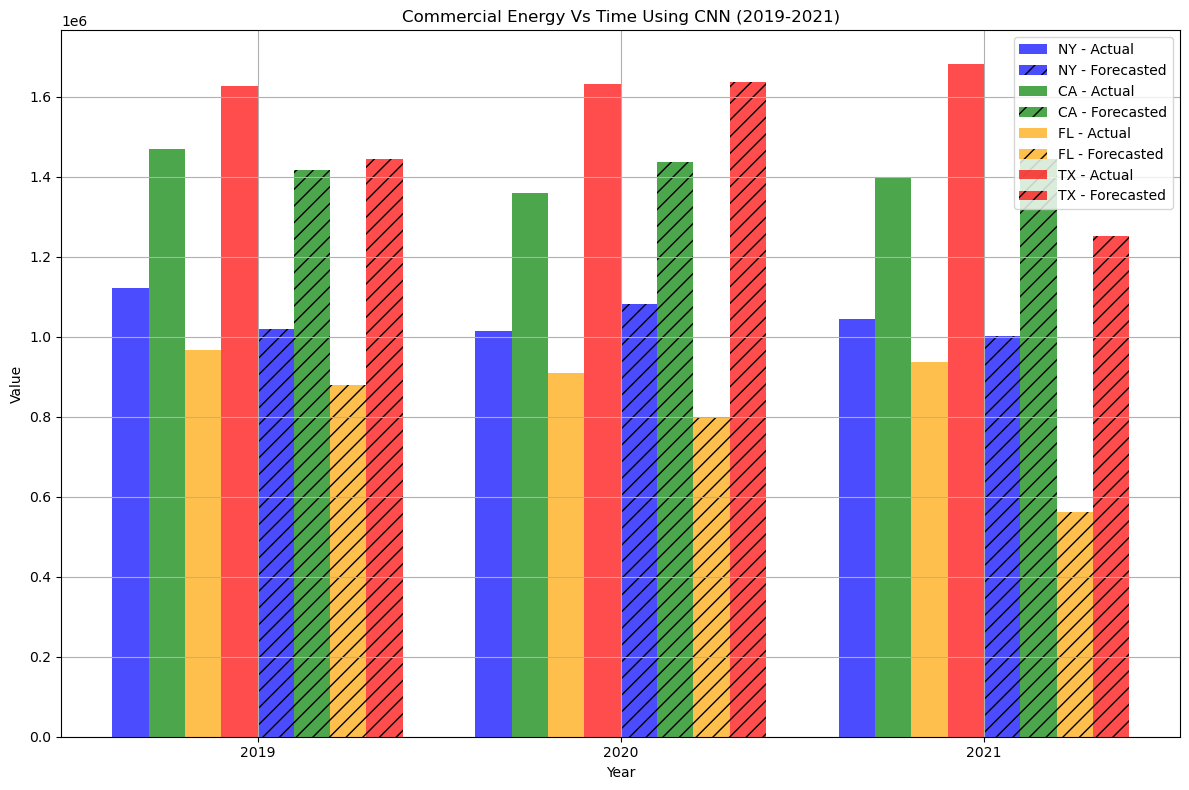

In [89]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Commercial_T_60.iloc[-3:]

# list of state abbreviations to plot
state_abbreviations = ['NY', 'CA', 'FL', 'TX']

# Set the width of the bars
bar_width = 0.1

# colors for each state
state_colors =  {'NY': 'blue', 'CA': 'green', 'FL': 'orange', 'TX': 'red'}

# bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(selected_years)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# X-label
plt.xlabel('Year')
# Y-label
plt.ylabel('Value')
# Title
plt.title('Commercial Energy Vs Time Using CNN (2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) + 3) * bar_width / 2
plt.xticks(combined_years, selected_years.index)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Machine Learning Forecasting 

### ARIMA

In [56]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['NY','CA','FL','TX']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Commercial.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

# Print the actual and forecasted values for each year and accuracy for each state
for state in selected_states:
    print(f"\n{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for all states (ARIMA):")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for all states (ARIMA):")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")




NY - Forecasted Values for 2022 and 2023:
2022: 1486789.88
2023: 1507702.38
Accuracy for NY (ARIMA) - 2019: 92.36%
Accuracy for NY (ARIMA) - 2020: 94.51%
Accuracy for NY (ARIMA) - 2021: 95.70

CA - Forecasted Values for 2022 and 2023:
2022: 1486789.88
2023: 1507702.38
Accuracy for CA (ARIMA) - 2019: 92.96%
Accuracy for CA (ARIMA) - 2020: 91.99%
Accuracy for CA (ARIMA) - 2021: 91.29

FL - Forecasted Values for 2022 and 2023:
2022: 1486789.88
2023: 1507702.38
Accuracy for FL (ARIMA) - 2019: 92.53%
Accuracy for FL (ARIMA) - 2020: 92.47%
Accuracy for FL (ARIMA) - 2021: 91.99

TX - Forecasted Values for 2022 and 2023:
2022: 1486789.88
2023: 1507702.38
Accuracy for TX (ARIMA) - 2019: 86.33%
Accuracy for TX (ARIMA) - 2020: 88.84%
Accuracy for TX (ARIMA) - 2021: 89.28

Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
NY: 1172395.16
CA: 1600566.90
FL: 1045288.12
TX: 1486789.88
Forecasts for 2023:
NY: 1162130.36
CA: 1603459.68
FL: 1047395.21
TX: 1507702.38

Mean Squared Error (M

### Saving as CSV file.

In [9]:
# Create the initial DataFrame
df_combined_results = pd.DataFrame({
    'State': list(mse_arima_dict.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],
})
# Save the combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_commercial.csv', index=False)

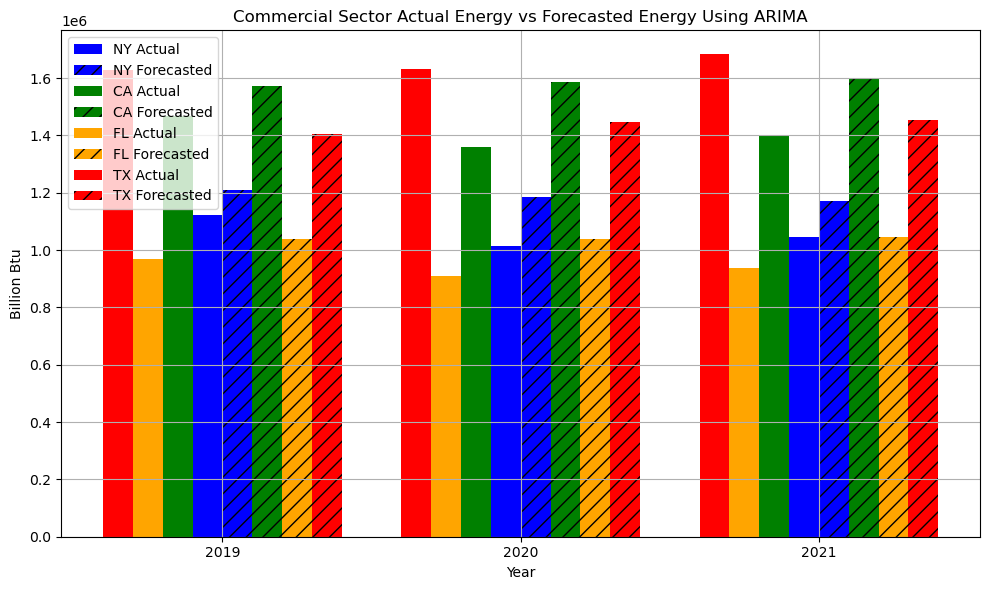

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# colors for each state
state_colors = {'NY': 'blue', 'CA': 'green', 'FL': 'orange', 'TX': 'red'}

# Create a  figure
plt.figure(figsize=(10, 6))

# The width of the bars and the space between bar groups
bar_width = 0.1
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Commercial.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten()  # Flatten the forecasted data

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Commercial Sector Actual Energy vs Forecasted Energy Using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
